evalutaion

In [2]:
#reach the 95 % accury on thr ml model
#features
#***create dictonary***

In [3]:
#prepare the tool,import all the tools

#reguler eda and plottig libarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#import sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evautaions
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve


In [4]:
#load the data
df=pd.read_csv("heart-disease.csv")
df.shape


(303, 14)

In [5]:
#data exploration(expolitory data analysis)
#find more about the data

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

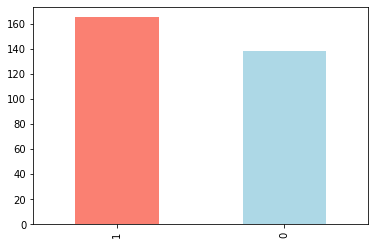

In [7]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
#check for the missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
#heart desiesa according to the  gender
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
#compare target column with gender column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


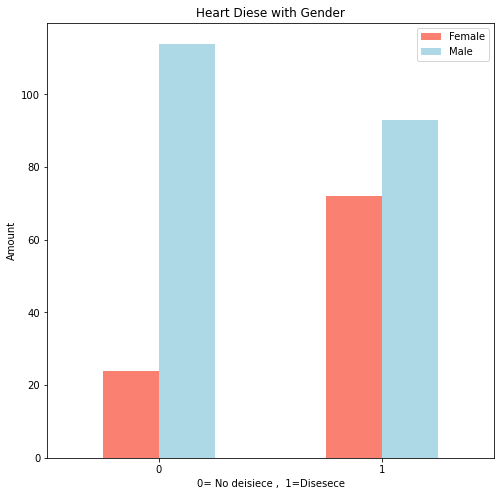

In [13]:
#create a plot 
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(8,8),
                                  color=["salmon","lightblue"]);

plt.title("Heart Diese with Gender")
plt.xlabel("0= No deisiece ,  1=Disesece")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
df["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

In [16]:
##AGE VS MAX HEART RATE

In [17]:
X=df.drop("target",axis=1)

In [18]:
y=df["target"]

In [19]:
X


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [20]:
np.random.seed(42)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [22]:
len(X_train)

242

In [23]:
len(y_test)

61

In [24]:
#Models try
#logistric regerssion
#k nearest neighbours classifer
#random forrest classifier


In [28]:
#put models into the dictonary
models ={"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()}

#cretate a fucntion to fit and score models

def fit_and_score(models,X_train,X_test,y_train,y_test):
    
    """
    Fits and evaluates given ml modles.
    models:a dict of difference skleran ml modleus
    X_train=training data
    X_test=test data
    y_train=training labels
    y_test=test_labels
    """
    
    #set random seed
    np.random.seed(42)
    
    #make dictonary to keep model scores
    models_scores={}
    
    #loop thorough models
    
    for name,model in models.items():
        #fit the model to data
        model.fit(X_train,y_train)
        
        #evaluate the model and append score to the model
        models_scores[name]=model.score(X_test,y_test)
        
    return models_scores


In [30]:
model_scores=fit_and_score(models=models,
                           X_train=X_train,
                          X_test=X_test,
                          y_train=y_train,
                          y_test=y_test)

model_scores

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

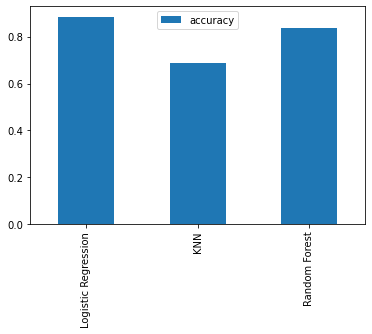

In [32]:
#model comparisson

model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

lets look at the folowing

*Hyper parameter tuning

*feature importance

*cross validation

*presistion

*recall

*f1 score

*classfication score

*ROC curve

*area under the curve

### Hyperparametr tuning`


In [46]:
#tune the knn
train_scores=[]
test_scores=[]

#create a list of neighbours
neighbours=range(1,21)

#setup knn instanence
knn =KNeighborsClassifier()

#LOOP though the different k neighbours
for i in neighbours:
    knn.set_params(n_neighbors=i)
    
    #fit the algorithem
    knn.fit(X_train,y_train)
    
    #update the tarinning scores list
    train_scores.append(knn.score(X_train,y_train))
    
    #update the test scoe list
    test_scores.append(knn.score(X_test,y_test))


In [47]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [48]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

MXIMUM KNN SCORE on test data:75.41%


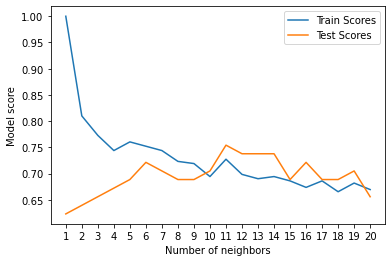

In [49]:
plt.plot(neighbours,train_scores,label="Train Scores")
plt.plot(neighbours,test_scores,label="Test Scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"MXIMUM KNN SCORE on test data:{max(test_scores)*100:.2f}%")

In [1]:
print("Hello world")

Hello world


In [2]:
evalutaion

#reach the 95 % accury on thr ml model
#features
#***create dictonary***

#prepare the tool,import all the tools

#reguler eda and plottig libarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#import sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evautaions
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve


#load the data
df=pd.read_csv("heart-disease.csv")
df.shape


#data exploration(expolitory data analysis)
#find more about the data

df.head()

df["target"].value_counts()

df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

df.info()

#check for the missing values
df.isna().sum()

df.describe()


#heart desiesa according to the  gender
df.sex.value_counts()

#compare target column with gender column
pd.crosstab(df.target,df.sex)

#create a plot 
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(8,8),
                                  color=["salmon","lightblue"]);

plt.title("Heart Diese with Gender")
plt.xlabel("0= No deisiece ,  1=Disesece")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

df.head()

df["thalach"].value_counts()

##AGE VS MAX HEART RATE

X=df.drop("target",axis=1)

y=df["target"]

X


np.random.seed(42)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

len(X_train)

len(y_test)

#Models try
#logistric regerssion
#k nearest neighbours classifer
#random forrest classifier


#put models into the dictonary
models ={"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()}

#cretate a fucntion to fit and score models

def fit_and_score(models,X_train,X_test,y_train,y_test):
    
    """
    Fits and evaluates given ml modles.
    models:a dict of difference skleran ml modleus
    X_train=training data
    X_test=test data
    y_train=training labels
    y_test=test_labels
    """
    
    #set random seed
    np.random.seed(42)
    
    #make dictonary to keep model scores
    models_scores={}
    
    #loop thorough models
    
    for name,model in models.items():
        #fit the model to data
        model.fit(X_train,y_train)
        
        #evaluate the model and append score to the model
        models_scores[name]=model.score(X_test,y_test)
        
    return models_scores


model_scores=fit_and_score(models=models,
                           X_train=X_train,
                          X_test=X_test,
                          y_train=y_train,
                          y_test=y_test)

model_scores

#model comparisson

model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

lets look at the folowing

*Hyper parameter tuning

*feature importance

*cross validation

*presistion

*recall

*f1 score

*classfication score

*ROC curve

*area under the curve

### Hyperparametr tuning`


#tune the knn
train_scores=[]
test_scores=[]

#create a list of neighbours
neighbours=range(1,21)

#setup knn instanence
knn =KNeighborsClassifier()

#LOOP though the different k neighbours
for i in neighbours:
    knn.set_params(n_neighbors=i)
    
    #fit the algorithem
    knn.fit(X_train,y_train)
    
    #update the tarinning scores list
    train_scores.append(knn.score(X_train,y_train))
    
    #update the test scoe list
    test_scores.append(knn.score(X_test,y_test))


train_scores

test_scores

plt.plot(neighbours,train_scores,label="Train Scores")
plt.plot(neighbours,test_scores,label="Test Scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"MXIMUM KNN SCORE on test data:{max(test_scores)*100:.2f}%")

###Hyperparameter tuning with randomized search cv

tune the :
    *logistciregression
    
    *ranodomforrest clasifer
    
    using randomserch cv

#CREATE A HYPERPARAMETER GRID FOR LOGISTIC REGRESTION
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver" :["liblinear"]}

#create a hyperparameter grid for random forrest classifer
rf_grid ={"n_estimators" :np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split" :np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}


#tune logictic regresstion

np.random.seed(42)

#setup random hyprparameter serch for logictic regrestion

re_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

#fit random hyperparameter for logicticregresstion

re_log_reg.fit(X_train,y_train)

re_log_reg.best_params_

re_log_reg.score(X_test,y_test)

#Now tuned the random forrest classfier


#setup random seed
np.random.seed(42)

#setup random hyperparameter erch random forrest
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)

#fit random forrest classifier

rs_rf.fit(X_train,y_train)

#fing the best hyperparameters
rs_rf.best_params_

rs_rf.score(X_test,y_test)

#hyperparameter tuning using grid serch cv


#different hyperparameter grid for logisticregersstio model

log_reg_grid ={"C" :np.logspace(-4,4,30),
              "solver" :["liblinear"]}

#setup grid hyperparameter serch for logictic regersttion
gs_log_reg =GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True
                        )

#fit the grid hyper mater model

gs_log_reg.fit(X_train,y_train)

#check the best hyperparameters
gs_log_reg.best_params_

#evaluate the grid serch logic regrestion model

gs_log_reg.score(X_test,y_test)









SyntaxError: invalid syntax (<ipython-input-2-25120f80c3f8>, line 145)

In [1]:
print("Hello World")

Hello World


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


sex,0,1
target,,
0,24,114
1,72,93


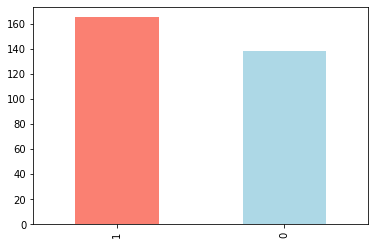

In [3]:
#reguler eda and plottig libarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#import sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evautaions
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve


#load the data
df=pd.read_csv("heart-disease.csv")
df.shape


#data exploration(expolitory data analysis)
#find more about the data

df.head()

df["target"].value_counts()

df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

df.info()

#check for the missing values
df.isna().sum()

df.describe()


#heart desiesa according to the  gender
df.sex.value_counts()

#compare target column with gender column
pd.crosstab(df.target,df.sex)

#Evaluating the tuned ml model, beyond the accuracy


*roc curve

*confution matrix

*precision

*recall

*f-1 score

*cross validation

In [2]:
#mmake predictions with tund model

y_preds =gs_log_reg.predict(X_test)

NameError: name 'gs_log_reg' is not defined

61

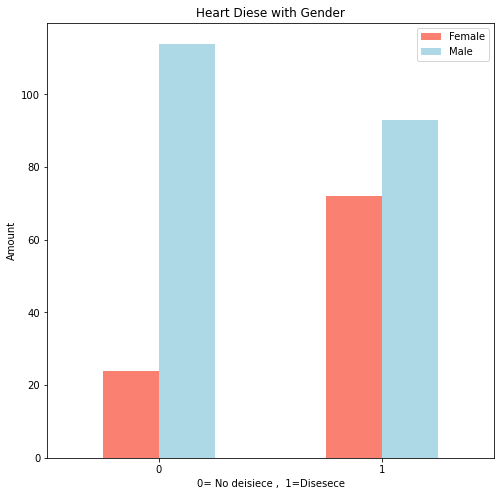

In [4]:
#create a plot 
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(8,8),
                                  color=["salmon","lightblue"]);

plt.title("Heart Diese with Gender")
plt.xlabel("0= No deisiece ,  1=Disesece")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

df.head()

df["thalach"].value_counts()

##AGE VS MAX HEART RATE

X=df.drop("target",axis=1)

y=df["target"]

X


np.random.seed(42)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

len(X_train)

len(y_test)


In [6]:
#put models into the dictonary
models ={"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()}

#cretate a fucntion to fit and score models

def fit_and_score(models,X_train,X_test,y_train,y_test):
    
    """
    Fits and evaluates given ml modles.
    models:a dict of difference skleran ml modleus
    X_train=training data
    X_test=test data
    y_train=training labels
    y_test=test_labels
    """
    
    #set random seed
    np.random.seed(42)
    
    #make dictonary to keep model scores
    models_scores={}
    
    #loop thorough models
    
    for name,model in models.items():
        #fit the model to data
        model.fit(X_train,y_train)
        
        #evaluate the model and append score to the model
        models_scores[name]=model.score(X_test,y_test)
        
    return models_scores


model_scores=fit_and_score(models=models,
                           X_train=X_train,
                          X_test=X_test,
                          y_train=y_train,
                          y_test=y_test)

model_scores



C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

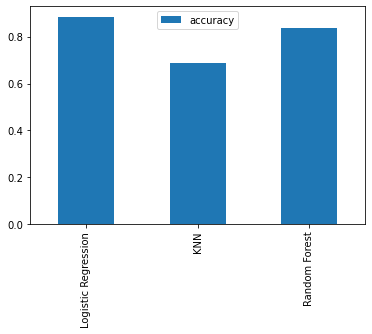

In [7]:
#model comparisson

model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();




lets look at the folowing

*Hyper parameter tuning

*feature importance

*cross validation

*presistion

*recall

*f1 score

*classfication score

*ROC curve

*area under the curve



MXIMUM KNN SCORE on test data:75.41%


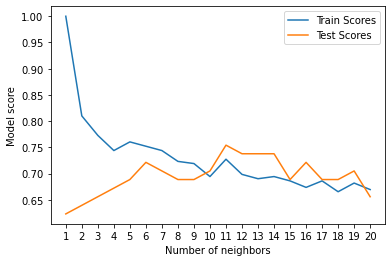

In [8]:
### Hyperparametr tuning`


#tune the knn
train_scores=[]
test_scores=[]

#create a list of neighbours
neighbours=range(1,21)

#setup knn instanence
knn =KNeighborsClassifier()

#LOOP though the different k neighbours
for i in neighbours:
    knn.set_params(n_neighbors=i)
    
    #fit the algorithem
    knn.fit(X_train,y_train)
    
    #update the tarinning scores list
    train_scores.append(knn.score(X_train,y_train))
    
    #update the test scoe list
    test_scores.append(knn.score(X_test,y_test))


train_scores

test_scores

plt.plot(neighbours,train_scores,label="Train Scores")
plt.plot(neighbours,test_scores,label="Test Scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"MXIMUM KNN SCORE on test data:{max(test_scores)*100:.2f}%")




###Hyperparameter tuning with randomized search cv

tune the :
    *logistciregression
    
    *ranodomforrest clasifer
    
    using randomserch cv



In [9]:
#CREATE A HYPERPARAMETER GRID FOR LOGISTIC REGRESTION
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver" :["liblinear"]}

#create a hyperparameter grid for random forrest classifer
rf_grid ={"n_estimators" :np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split" :np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}


#tune logictic regresstion

np.random.seed(42)

#setup random hyprparameter serch for logictic regrestion

re_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

#fit random hyperparameter for logicticregresstion

re_log_reg.fit(X_train,y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [10]:
re_log_reg.best_params_

re_log_reg.score(X_test,y_test)



0.8852459016393442

In [11]:
#Now tuned the random forrest classfier


#setup random seed
np.random.seed(42)

#setup random hyperparameter erch random forrest
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)

#fit random forrest classifier

rs_rf.fit(X_train,y_train)

#fing the best hyperparameters
rs_rf.best_params_

rs_rf.score(X_test,y_test)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


0.8688524590163934

In [12]:
#hyperparameter tuning using grid serch cv


#different hyperparameter grid for logisticregersstio model

log_reg_grid ={"C" :np.logspace(-4,4,30),
              "solver" :["liblinear"]}

#setup grid hyperparameter serch for logictic regersttion
gs_log_reg =GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True
                        )

#fit the grid hyper mater model

gs_log_reg.fit(X_train,y_train)



Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [13]:
#check the best hyperparameters
gs_log_reg.best_params_




{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [14]:
#evaluate the grid serch logic regrestion model

gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [15]:
#make predictions with tuned model
y_preds=gs_log_reg.predict(X_test)

In [16]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [17]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

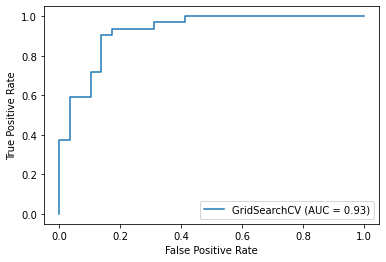

In [18]:
#import ROC curve from skleran functios
#plot roc curve and calclute

plot_roc_curve(gs_log_reg,X_test,y_test)

In [19]:
#confution metrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


In [20]:
sns


<module 'seaborn' from 'C:\\Users\\Acer\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

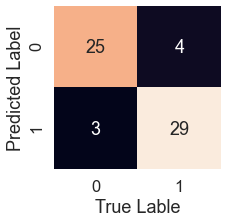

In [23]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking matrix using seabrn heatmap
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    
    plt.xlabel("True Lable")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(y_test,y_preds)

#get the classsfication report and recall and f1 score

In [24]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



clalculte evaluation metrix using cross validation

In [25]:
#check the best hyper parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [27]:
#create a new classifiers

clf=LogisticRegression(C=0.20433597178569418,
                      solver= 'liblinear')


In [31]:
#CROSS VALIDATED ACCURACY
cv_acc=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring="accuracy")

cv_acc


array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [32]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [34]:
#CROSS VALIDATED PRECISTION
cv_presition=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring="precision")

cv_presition =np.mean(cv_presition)
cv_presition

0.8207936507936507

In [35]:
#CROSS VALIDATED F1 SCORE
cv_f1_score=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring="f1")
cv_f1_score=np.mean(cv_f1_score)
cv_f1_score

0.8673007976269721

In [36]:
#cross validation recall
cv_recall=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

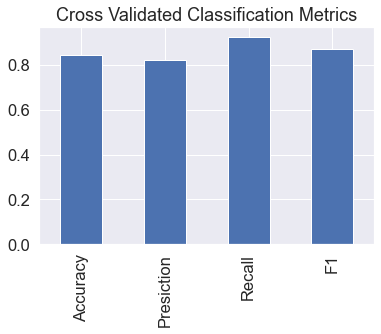

In [38]:
#visulization cross validated metrics

cv_metrics =pd.DataFrame({"Accuracy":cv_acc,
                        "Presiction" :cv_presition,
                        "Recall" :cv_recall,
                        "F1" :cv_f1_score},
                        index=[0])

cv_metrics.T.plot.bar(title="Cross Validated Classification Metrics",
                     legend =False)


In [39]:
#feature Importance
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
#find feature importnace for logictic regresttion
#"Model name : feature importance"

In [41]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [42]:
clf=LogisticRegression(C=0.20433597178569418,
                      solver="liblinear")

clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [43]:
#check coef
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [44]:
#match the features to coloumns

feature_dict =dict(zip(df.columns,list(clf.coef_[0])))
feature_dict


{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

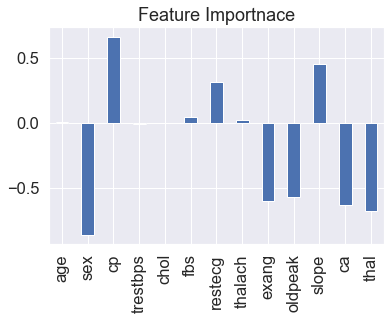

In [45]:
#Visulaixze the fetaure importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importnace",legend=False);

In [46]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [48]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
